# Used Cars Price Prediction

here we have 13 feature columns and price is target columns

**id**:- Index of row

**Name**:- The brand and model of the car.

**Location**:- The location in which the car is being sold or is available for purchase.

**Year**:- The year or edition of the model.

**Kilometers_Driven**:- The total kilometres driven in the car by the previous owner(s) in KM.


**Fuel_Type**:- The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

**Transmission**:- The type of transmission used by the car. (Automatic / Manual)

**Owner_Type**:- the type of Owner. (First/Second)

**Mileage**:- The standard mileage offered by the car company in kmpl or km/kg

**Engine**:- The displacement volume of the engine in CC.

**Power**:-The maximum power of the engine in bhp.

**Seats**:-The number of seats in the car.

**New_Price**:-The price of a new car of the same model.

**Price**:-The price of the used car in INR Lakhs.

# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# 2. EDA

In [2]:
df = pd.read_csv("train-data.csv")

In [3]:
test = pd.read_csv('test-data.csv')

In [4]:
df.shape

(6019, 14)

In [5]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


**1. Location**

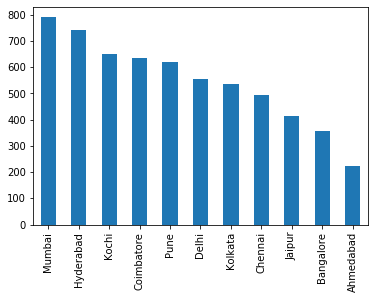

In [6]:
df['Location'].value_counts().plot(kind='bar')

Here Mumbai city have maximum used cars for sale and Ahmedabad have minimum used cars for sale.

**2. year**

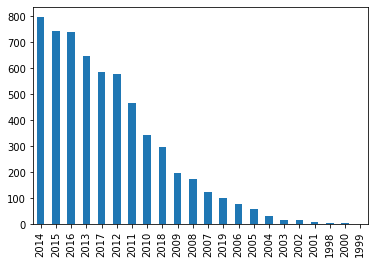

In [7]:
df['Year'].value_counts().plot(kind='bar')

here we have 1998 to 2017 year data inwhich 2014 have high number of used cars sale records.

**3. Fuel_Type**

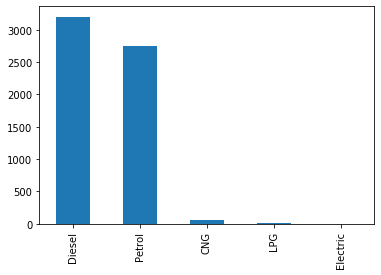

In [8]:
df['Fuel_Type'].value_counts().plot(kind='bar')

Here approximantly **98%** cars have **Diesel and Petrol** fule_type.

**4. Transmission**

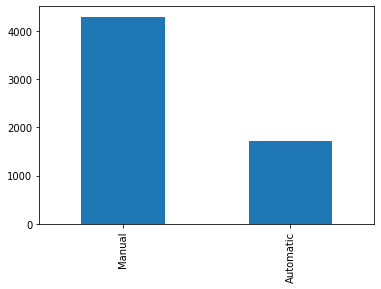

In [9]:
df['Transmission'].value_counts().plot(kind='bar')

Here more than **50%** cars have **Manual transmission**.

**5. Owner_Type**

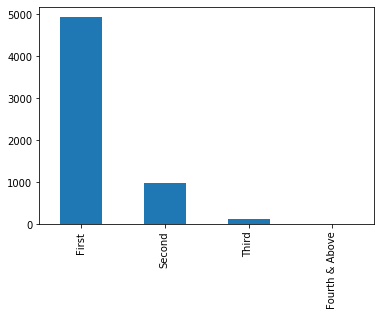

In [10]:
df['Owner_Type'].value_counts().plot(kind='bar')

Here more than **80% cars** are sale for the **first time**.

**6. Seats**

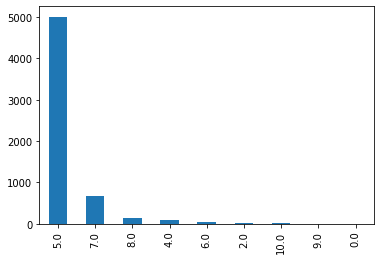

In [11]:
df['Seats'].value_counts().plot(kind='bar')

around **85%** cars have **5 seats**

**Missing values**

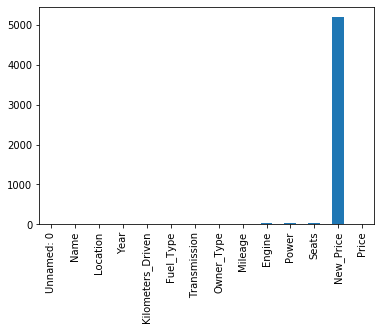

In [12]:
df.isna().sum().plot(kind='bar')

Here New_Price column have 85% of data 

**3.Preprocess Data**

In [13]:
df = pd.read_csv("train-data.csv")
test = pd.read_csv('test-data.csv')

In [14]:
df = pd.concat((df,test))

In [15]:
df.reset_index(inplace=True,drop=True)

In [16]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [17]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [18]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [19]:
df.drop(columns=['New_Price'],inplace=True)

In [20]:
df['Mileage'].fillna(df['Mileage'].mode()[0],inplace=True)

In [21]:
df['Mileage'].isna().sum()

0

In [22]:
df['Engine'].fillna(df['Engine'].mode()[0],inplace=True)

In [23]:
df['Power'].fillna(df['Power'].mode()[0],inplace=True)

In [24]:
df['Seats'].fillna(df['Seats'].mode()[0],inplace=True)

In [25]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
dtype: int64

In [26]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [27]:
# test = pd.read_csv("test-data.csv")

In [28]:
test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [29]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
dtype: int64

In [30]:
len(df['Location'].unique())

11

In [31]:
df = pd.get_dummies(df,columns=['Location','Fuel_Type','Transmission','Owner_Type'],drop_first=True)

In [32]:
df.head()

,Unnamed: 0,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Wagon R LXI CNG,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,0,...,1,0,0,0,0,0,1,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,0,...,0,1,1,0,0,0,1,0,0,0
2,2,Honda Jazz V,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,...,0,0,0,0,0,1,1,0,0,0
3,3,Maruti Ertiga VDI,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,0,...,0,0,1,0,0,0,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,0,...,0,0,1,0,0,0,0,0,1,0


In [33]:
df.columns

Index(['Unnamed: 0', 'Name', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine',
       'Power', 'Seats', 'Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [34]:
df.isna().sum()

Unnamed: 0                      0
Name                            0
Year                            0
Kilometers_Driven               0
Mileage                         0
Engine                          0
Power                           0
Seats                           0
Price                        1234
Location_Bangalore              0
Location_Chennai                0
Location_Coimbatore             0
Location_Delhi                  0
Location_Hyderabad              0
Location_Jaipur                 0
Location_Kochi                  0
Location_Kolkata                0
Location_Mumbai                 0
Location_Pune                   0
Fuel_Type_Diesel                0
Fuel_Type_Electric              0
Fuel_Type_LPG                   0
Fuel_Type_Petrol                0
Transmission_Manual             0
Owner_Type_Fourth & Above       0
Owner_Type_Second               0
Owner_Type_Third                0
dtype: int64

In [35]:
for i in df.columns:
    print (i)
    print (df[df[i]=='null'])

Unnamed: 0
Empty DataFrame
Columns: [Unnamed: 0, Name, Year, Kilometers_Driven, Mileage, Engine, Power, Seats, Price, Location_Bangalore, Location_Chennai, Location_Coimbatore, Location_Delhi, Location_Hyderabad, Location_Jaipur, Location_Kochi, Location_Kolkata, Location_Mumbai, Location_Pune, Fuel_Type_Diesel, Fuel_Type_Electric, Fuel_Type_LPG, Fuel_Type_Petrol, Transmission_Manual, Owner_Type_Fourth & Above, Owner_Type_Second, Owner_Type_Third]
Index: []

[0 rows x 27 columns]
Name
Empty DataFrame
Columns: [Unnamed: 0, Name, Year, Kilometers_Driven, Mileage, Engine, Power, Seats, Price, Location_Bangalore, Location_Chennai, Location_Coimbatore, Location_Delhi, Location_Hyderabad, Location_Jaipur, Location_Kochi, Location_Kolkata, Location_Mumbai, Location_Pune, Fuel_Type_Diesel, Fuel_Type_Electric, Fuel_Type_LPG, Fuel_Type_Petrol, Transmission_Manual, Owner_Type_Fourth & Above, Owner_Type_Second, Owner_Type_Third]
Index: []

[0 rows x 27 columns]
Year
Empty DataFrame
Columns: [Unnam

C:\Users\Chintan\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\Chintan\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\Chintan\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\Chintan\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\Chintan\anaconda3\lib\site-packages\pandas\core

Empty DataFrame
Columns: [Unnamed: 0, Name, Year, Kilometers_Driven, Mileage, Engine, Power, Seats, Price, Location_Bangalore, Location_Chennai, Location_Coimbatore, Location_Delhi, Location_Hyderabad, Location_Jaipur, Location_Kochi, Location_Kolkata, Location_Mumbai, Location_Pune, Fuel_Type_Diesel, Fuel_Type_Electric, Fuel_Type_LPG, Fuel_Type_Petrol, Transmission_Manual, Owner_Type_Fourth & Above, Owner_Type_Second, Owner_Type_Third]
Index: []

[0 rows x 27 columns]
Fuel_Type_Diesel
Empty DataFrame
Columns: [Unnamed: 0, Name, Year, Kilometers_Driven, Mileage, Engine, Power, Seats, Price, Location_Bangalore, Location_Chennai, Location_Coimbatore, Location_Delhi, Location_Hyderabad, Location_Jaipur, Location_Kochi, Location_Kolkata, Location_Mumbai, Location_Pune, Fuel_Type_Diesel, Fuel_Type_Electric, Fuel_Type_LPG, Fuel_Type_Petrol, Transmission_Manual, Owner_Type_Fourth & Above, Owner_Type_Second, Owner_Type_Third]
Index: []

[0 rows x 27 columns]
Fuel_Type_Electric
Empty DataFrame


C:\Users\Chintan\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\Chintan\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\Chintan\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\Chintan\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\Chintan\anaconda3\lib\site-packages\pandas\core

In [36]:
df.replace('null',np.NaN,inplace=True)
df['Power'].fillna(df['Power'].mode()[0],inplace=True)

In [37]:
for i in range(len(df)):
    df['Mileage'][i] = df['Mileage'][i].split()[0]
    df['Engine'][i] = df['Engine'][i].split()[0]
    df['Power'][i] = df['Power'][i].split()[0]

C:\Users\Chintan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Chintan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Chintan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after remo

In [38]:
df.replace('null',np.NaN,inplace=True)
df['Power'].fillna(df['Power'].mode()[0],inplace=True)

In [39]:
for i in range(len(df)):
    df['Mileage'][i] = float(df['Mileage'][i].split()[0])
    df['Engine'][i] = float(df['Engine'][i].split()[0])
    df['Power'][i] = float(df['Power'][i].split()[0])

C:\Users\Chintan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Chintan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Chintan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after remo

In [40]:
train = df[:6019]
test = df[6019:]

In [41]:
train.columns

Index(['Unnamed: 0', 'Name', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine',
       'Power', 'Seats', 'Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [42]:
train.drop(columns=['Unnamed: 0','Name'],inplace=True)

C:\Users\Chintan\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
test.drop(columns=['Unnamed: 0','Name','Price'],inplace=True)

# Skewness

In [44]:
numeric_feats = train.dtypes[df.dtypes != "object"].index

In [45]:
numeric_feats

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [46]:
from scipy.stats import norm, skew

numeric_feats = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(55)


Skew in numerical features: 



,Skew
Kilometers_Driven,58.710026
Fuel_Type_Electric,54.831563
Owner_Type_Fourth & Above,25.802699
Fuel_Type_LPG,24.472467
Owner_Type_Third,7.091165
Location_Bangalore,3.725062
Location_Jaipur,3.412846
Price,3.334401
Location_Chennai,3.045262
Location_Kolkata,2.889295


In [47]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    train[feat] = boxcox1p(train[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 22 skewed numerical features to Box Cox transform


C:\Users\Chintan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [48]:
train.shape

(6019, 25)

In [49]:
X_train = train.drop(columns=['Price'])
y_train = train['Price']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [51]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression,LinearRegression
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold,cross_validate
from sklearn.metrics import explained_variance_score,mean_squared_error,r2_score
# from sklearn.model_selection import cross_validation

In [52]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

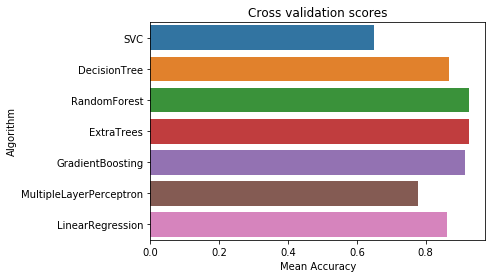

In [53]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVR())
classifiers.append(DecisionTreeRegressor(random_state=random_state))
# classifiers.append(AdaBoostRegressor(DecisionTreeRegressor(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestRegressor(random_state=random_state))
classifiers.append(ExtraTreesRegressor(random_state=random_state))
classifiers.append(GradientBoostingRegressor(random_state=random_state))
classifiers.append(MLPRegressor(random_state=random_state))
# classifiers.append(KNeighborsClassifier())
classifiers.append(LinearRegression())
# classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    cv_results.append(r2_score(y_test,y_pred))
#     scores = cross_validate.kfold(classifier, X_train, y_train, scoring='mean_squared_error', cv=kfold)
    
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result)
    cv_std.append(cv_result)

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","LinearRegression"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


In [54]:
lin = []
lin_folds = []

model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
for i in range(3,18,2):
    grid = GridSearchCV(model,parameters, cv=i,scoring="r2", n_jobs= -1, verbose = 1)
#     ExtC,param_grid = ex_param_grid, cv=kfold, scoring="r2", n_jobs= -1, verbose = 1
    grid.fit(X_train, y_train)
    
    
    linear_best = grid.best_estimator_
    lin_folds.append(grid.best_score_)
    lin.append(linear_best)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 7 folds for each of 8 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 9 folds for each of 8 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 11 folds for each of 8 candidates, totalling 88 fits


[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 13 folds for each of 8 candidates, totalling 104 fits


[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 15 folds for each of 8 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 17 folds for each of 8 candidates, totalling 136 fits


[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    1.3s finished


In [55]:
linear_best

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [56]:
linear_best.score(X_train,y_train)

0.8765551029435222

In [57]:
y_pred = linear_best.predict(X_test)

In [58]:
r2_score(y_test,y_pred)

0.862949352219274

In [59]:
mean_squared_error(y_test,y_pred)

0.16011280163779548

In [60]:
#ExtraTrees 
ExtC = ExtraTreesRegressor()


## Search grid for optimal parameters
ex_param_grid = {
#               "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[50,100,200,300]}
etc_folds = []
etcc = []
for i in range(5,18,2):

    kfold =i
    gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="r2", n_jobs= -1, verbose = 1)

    gsExtC.fit(X_train,y_train)

    ExtC_best = gsExtC.best_estimator_
    etc_folds.append(gsExtC.best_score_)
    etcc.append(ExtC_best)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.4min finished


Fitting 7 folds for each of 36 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:  3.6min finished


Fitting 9 folds for each of 36 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  4.8min finished


Fitting 11 folds for each of 36 candidates, totalling 396 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 396 out of 396 | elapsed:  7.0min finished


Fitting 13 folds for each of 36 candidates, totalling 468 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed:  8.8min finished


Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  8.6min finished


Fitting 17 folds for each of 36 candidates, totalling 612 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 612 out of 612 | elapsed: 10.9min finished


In [61]:
ExtC_best

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=3, min_weight_fraction_leaf=0.0,
                    n_estimators=300, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [62]:
gsExtC.best_score_

0.9363255483599598

In [63]:
ExtC_best.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=3, min_weight_fraction_leaf=0.0,
                    n_estimators=300, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [64]:
ExtC_best.score(X_train,y_train)

0.9988860462787748

In [65]:
y_pred = ExtC_best.predict(X_test)

In [66]:
r2_score(y_test,y_pred)

0.9255502471287936

In [67]:
mean_squared_error(y_test,y_pred)

0.08697776118885861

In [68]:
# RFC Parameters tunning 
RFC = RandomForestRegressor()


## Search grid for optimal parameters
rf_param_grid = {
#               "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[50,100,200,300]}

rfc_folds =[]
rfcc = []
for i in range(5,18,2):
    kfold = i

    gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="r2", n_jobs= -1, verbose = 1)

    gsRFC.fit(X_train,y_train)

    RFC_best = gsRFC.best_estimator_
    
    rfc_folds.append(gsRFC.best_score_)
    rfcc.append(RFC_best)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.6min finished


Fitting 7 folds for each of 36 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:  6.9min finished


Fitting 9 folds for each of 36 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  9.2min finished


Fitting 11 folds for each of 36 candidates, totalling 396 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 396 out of 396 | elapsed: 11.5min finished


Fitting 13 folds for each of 36 candidates, totalling 468 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed: 16.2min finished


Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 21.5min finished


Fitting 17 folds for each of 36 candidates, totalling 612 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 612 out of 612 | elapsed: 21.8min finished


In [69]:
gsRFC.best_score_

0.8877601488036246

In [70]:
RFC_best

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [71]:
RFC_best.score(X_train,y_train)

0.9689184734111476

In [72]:
y_pred = RFC_best.predict(X_test)

In [73]:
r2_score(y_test,y_pred)

0.8824905997458583

In [74]:
mean_squared_error(y_test,y_pred)

0.1372832569428665

Using ExtraTrees we achieve **92% r2 score**.